# **Information about the database**

We have given the Data for Admission in the University.


The different entities or parameters in the dataset are -

**Serial No** : To uniquely indentify students

**GRE Score **: Score of GRE test which is an important test for admissions in the graduate school or business school application process globally.

**TOEFL Score** : Test of English as a Foreign Language exam score
University 

**Rating** : Rating of the University out of 5

**SOP** : Related to Statement of Purpose(SOP) for applying to a particular course or university.

**LOR** : Some score related to LOR i.e a letter of recommendation

**CGPA** : CGPA is a past performance measure of aspirant

**Research** : Binary values of either 1 or 0

**Chance of Admit** : Probability of the student to get admission the university

In [ ]:

import pandas as pd

df = pd.read_csv('adm_data.csv')

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


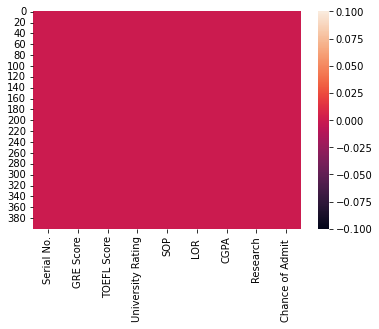

In [ ]:
# Missing values
import seaborn as sns
a = df.isna()
b = df.isna().cumsum()
# No missing values in the database
sns.heatmap(a)

In [ ]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

# **Part 0 : Binary analysis and Analyse of the correlation**

### **Quantitative variables**

In [ ]:
quanti_var = ['GRE Score', 'TOEFL Score', 'Chance of Admit ']
df[quanti_var].corr()

,GRE Score,TOEFL Score,Chance of Admit
GRE Score,1.000000,0.835977,0.802610
TOEFL Score,0.835977,1.000000,0.791594
Chance of Admit,0.802610,0.791594,1.000000


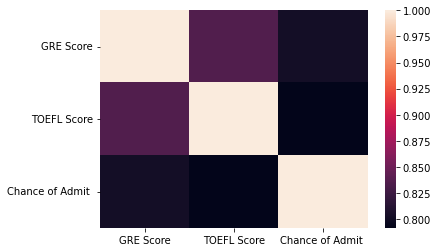

In [ ]:
sns.heatmap(df[quanti_var].corr())

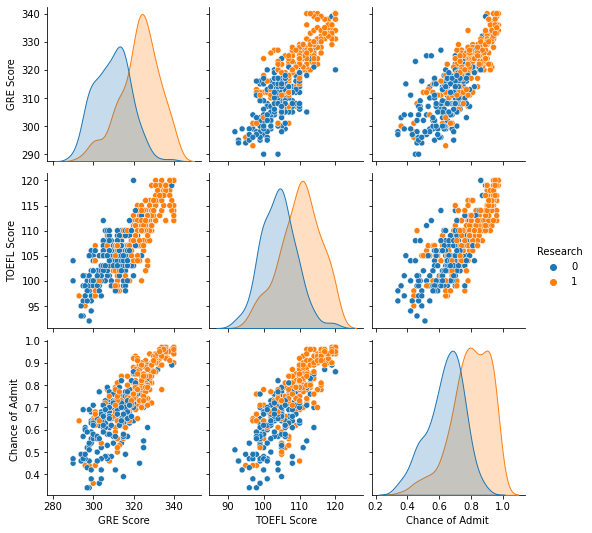

In [ ]:
quanti_var2 = ['GRE Score', 'TOEFL Score', 'Chance of Admit ', 'Research']
sns.pairplot(data = df[quanti_var2], hue='Research')

**Qualitative variables**

In [ ]:
quali_var = ['University Rating', 'SOP', 'LOR ', 'CG']


# **Part 1 : Chi-square test of independence of variables in a contingency table.**

---



This test computes the chi-square statistic and p-value for the hypothesis test of independence of the observed frequencies in the contingency table.

Let's use these two variables for that

**University Rating** : Rating of the University out of 5

**Research** : Binary values of either 1 or 0

In [ ]:
import numpy as np
from scipy.stats import chi2_contingency

In [ ]:
# chi square test
cont_table = pd.crosstab(df['University Rating'], df['Research'])
cont_table

Research,0,1
University Rating,,
1,21,5
2,75,32
3,62,71
4,15,59
5,8,52


In [ ]:

chi2, p_value_chi2, dof, ex = chi2_contingency(cont_table, correction=False)
chi2_contingency(cont_table, correction=False)

(83.3062176776905, 3.469248171530805e-17, 4, array([[11.765 , 14.235 ],
        [48.4175, 58.5825],
        [60.1825, 72.8175],
        [33.485 , 40.515 ],
        [27.15  , 32.85  ]]))

In [ ]:
p_value_chi2 < 0.05

True

In [ ]:
p_value_chi2

# The p-value is almost equal to 0 then less than 0.05
# We can rejet the null hypothesis of independance

# Conclusion : there is a relationship between 'Research' and 'University Rating'

3.469248171530805e-17

# **Conclusion**

The p-value is almost equal to 0 then less than 0.05

We can rejet the null hypothesis of independance

**Conclusion **: there is a relationship between 'Research' and 'University Rating' **texte en gras**

# **Part 2 : Student test**

**Student test for one sample**

---


This is a test for the null hypothesis that the expected value (mean) of a sample of independent observations a is equal to the given population mean, popmean.

In [ ]:
np.mean(df['Chance of Admit '])

0.72435

In [ ]:
from scipy import stats
stats.ttest_1samp(df['Chance of Admit '], 0.735, alternative='less')

Ttest_1sampResult(statistic=-1.4935909154075089, pvalue=0.06803645862191009)

In [ ]:
stats.ttest_1samp(df['Chance of Admit '], 0.715, alternative='greater')

Ttest_1sampResult(statistic=1.3112746534329025, pvalue=0.09525954011530906)

In [ ]:
stats.ttest_1samp(df['Chance of Admit '], 0.5)

Ttest_1sampResult(statistic=31.46357951846729, pvalue=3.999166270389783e-110)

**Test of student for independant populations 1**

---



This is a test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.

Let's use these two variables for that

**Research** : Binary values of either 1 or 0 (use as the group)

**Chance of Admit** : Probability of the student to get admission the university

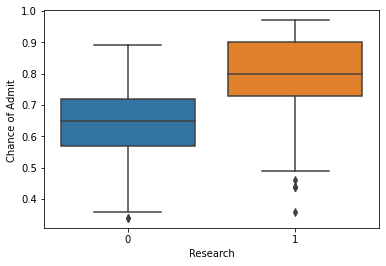

In [ ]:
import seaborn as sns

sns.boxplot(data=df, y='Chance of Admit ', x = 'Research')

In [ ]:
no_research = df['Chance of Admit '][df.Research == 0]

In [ ]:
with_research = df['Chance of Admit '][df.Research == 1]

In [ ]:
stats.ttest_ind(with_research, no_research)

Ttest_indResult(statistic=13.248168764786403, pvalue=1.918173380692434e-33)

# **Analyse of the variance ANOVA**



**We want to check if the variable 'Chance of Admit' is normally distributed**

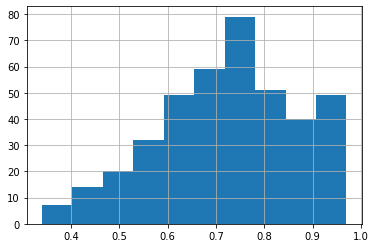

In [ ]:
df['Chance of Admit '].hist()

In [ ]:
df.shape

(400, 9)

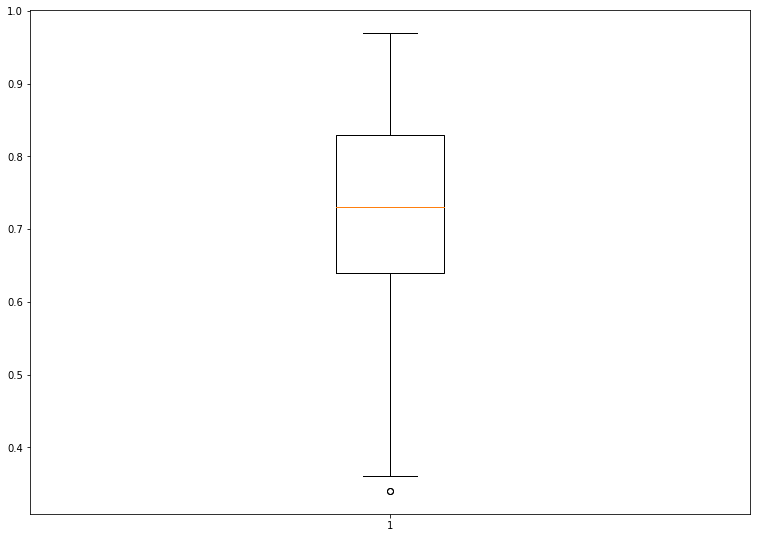

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(10, 7))

ax = fig.add_axes([0, 0, 1, 1])

bp = ax.boxplot(df['Chance of Admit '])

plt.show()

In [ ]:
from scipy.stats import shapiro
# Null hypothesis : Normal distribution

shapiro (df['Chance of Admit '])

# Conclusion : The variable is not normally distributed

ShapiroResult(statistic=0.9774671196937561, pvalue=7.037693649181165e-06)

**Vusualisation of the relationship between Chance of admit and University rating**

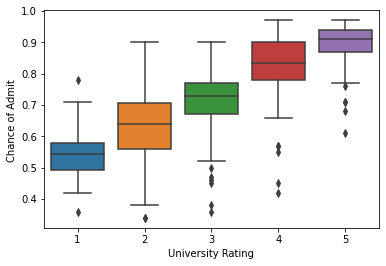

In [ ]:
sns.boxplot(data=df, y='Chance of Admit ', x = 'University Rating')

**Table of ANOVA - 1**

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
df['admit'] = df['Chance of Admit ']
df['rating'] = df['University Rating']

mod = ols('admit ~ rating', data=df).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

            sum_sq     df           F        PR(>F)
rating    4.105005    1.0  407.467332  6.635019e-63
Residual  4.009626  398.0         NaN           NaN


**Table of ANOVA - 2**

In [ ]:
rating_1 = df['Chance of Admit '][df['University Rating']==1]
rating_2 = df['Chance of Admit '][df['University Rating']==2]
rating_3 = df['Chance of Admit '][df['University Rating']==3]
rating_4 = df['Chance of Admit '][df['University Rating']==4]
rating_5 = df['Chance of Admit '][df['University Rating']==5]



In [ ]:
from scipy.stats import f_oneway
f, p = f_oneway(rating_1, rating_2, rating_3, rating_4, rating_5)
f_oneway(rating_1, rating_2, rating_3, rating_4, rating_5)

F_onewayResult(statistic=102.0800521553914, pvalue=1.313389994668425e-59)

**The p-value is less than 0.05**

## **Conclusion : The variable Universiy rating has an effect on the variable Chance of Admit**

# Linear regression

#Preprocessing

In [ ]:
df=df.drop(["Serial No."], axis=1)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,admit,rating
0,337,118,4,4.5,4.5,9.65,1,0.92,0.92,4
1,324,107,4,4.0,4.5,8.87,1,0.76,0.76,4
2,316,104,3,3.0,3.5,8.00,1,0.72,0.72,3
3,322,110,3,3.5,2.5,8.67,1,0.80,0.80,3
4,314,103,2,2.0,3.0,8.21,0,0.65,0.65,2
...,...,...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82,0.82,3
396,325,107,3,3.0,3.5,9.11,1,0.84,0.84,3
397,330,116,4,5.0,4.5,9.45,1,0.91,0.91,4
398,312,103,3,3.5,4.0,8.78,0,0.67,0.67,3


In [ ]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [ ]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df)
data =  pd.DataFrame(standardized_data, columns=df.columns)
data


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,admit,rating
0,1.762107,1.746971,0.798829,1.093864,1.167321,1.764818,0.909112,1.373648,1.373648,0.798829
1,0.627656,-0.067635,0.798829,0.596653,1.167321,0.455151,0.909112,0.250297,0.250297,0.798829
2,-0.070467,-0.562528,-0.076600,-0.397769,0.052933,-1.005631,0.909112,-0.030541,-0.030541,-0.076600
3,0.453126,0.427257,-0.076600,0.099442,-1.061454,0.119339,0.909112,0.531135,0.531135,-0.076600
4,-0.244998,-0.727492,-0.952029,-1.392191,-0.504260,-0.653029,-1.099975,-0.522007,-0.522007,-0.952029
...,...,...,...,...,...,...,...,...,...,...
395,0.627656,0.427257,-0.076600,0.099442,0.052933,0.740592,0.909112,0.671553,0.671553,-0.076600
396,0.714922,-0.067635,-0.076600,-0.397769,0.052933,0.858126,0.909112,0.811972,0.811972,-0.076600
397,1.151249,1.417042,0.798829,1.591075,1.167321,1.429006,0.909112,1.303439,1.303439,0.798829
398,-0.419528,-0.727492,-0.076600,0.099442,0.610127,0.304036,-1.099975,-0.381588,-0.381588,-0.076600


## **Features selection**

In [ ]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit ', 'admit', 'rating'],
      dtype='object')

**The independante variables**

In [ ]:
features = data.drop(['Chance of Admit ', 'admit','University Rating'], axis=1)
features.head()

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,rating
0,1.762107,1.746971,1.093864,1.167321,1.764818,0.909112,0.798829
1,0.627656,-0.067635,0.596653,1.167321,0.455151,0.909112,0.798829
2,-0.070467,-0.562528,-0.397769,0.052933,-1.005631,0.909112,-0.076600
3,0.453126,0.427257,0.099442,-1.061454,0.119339,0.909112,-0.076600
4,-0.244998,-0.727492,-1.392191,-0.504260,-0.653029,-1.099975,-0.952029


**The dependante variable**

In [ ]:
target = data['admit']

In [ ]:
from sklearn.feature_selection import mutual_info_classif


In [ ]:
from sklearn.feature_selection import RFE, RFECV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor


**Selection of the best features**

In [ ]:
selector_1 = RFECV(LinearRegression(), step=4, min_features_to_select=2, cv=5)

selector_1.fit_transform(features, target)

#selector_1.ranking_
#selector_1.grid_scores_

var_selected1 = np.array(features.columns)[selector_1.get_support()]
var_selected1

#All the variables are selected

array(['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA', 'Research',
       'rating'], dtype=object)

In [ ]:
target= pd.DataFrame(target)

In [ ]:
from sklearn.feature_selection import SelectFromModel

selector_3 = SelectFromModel(RandomForestRegressor())#, threshold='mean')
selector_3.fit_transform(features, target)
var_selected3 = np.array(features.columns)[selector_3.get_support()]
var_selected3

# Only one variable is selected

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_from_model.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


array(['CGPA'], dtype=object)

In [ ]:
selector_2 = SelectFromModel(LinearRegression())#, threshold='mean')
selector_2.fit_transform(features, target)
var_selected2 = np.array(features.columns)[selector_2.get_support()]
var_selected2

# Only one variable is selected

array(['CGPA'], dtype=object)

In [ ]:
selector_4 = SelectFromModel(DecisionTreeRegressor())#, threshold='mean')
selector_4.fit_transform(features, target)
var_selected4 = np.array(features.columns)[selector_4.get_support()]
var_selected4

# Only one variable is selected

array(['CGPA'], dtype=object)

**We will work will that only one independante variable**

In [ ]:
final_features = features[var_selected4]
final_features.head()

,CGPA
0,1.764818
1,0.455151
2,-1.005631
3,0.119339
4,-0.653029


In [ ]:
final_features.corr()

,CGPA
CGPA,1.0


**Split in train and test sets**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(final_features, target, test_size=0.2, random_state=6)

In [ ]:
y_train = pd.DataFrame(y_train)
y_train.shape

(320, 1)

In [ ]:
y_test = pd.DataFrame(y_test)
y_test.shape

(80, 1)

**Selection of the best model for the regression**

In [ ]:
model_1 = LinearRegression()
model_2 = DecisionTreeRegressor(random_state=0)
model_3 = RandomForestRegressor(n_estimators = 100)

for model in (model_1, model_2, model_3):
     model.fit(X_train, y_train)
     print(model.__class__.__name__, model.score(X_test, y_test))


LinearRegression 0.6289221866496535
DecisionTreeRegressor 0.3364690115319131
RandomForestRegressor 0.5003040501201943


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


**The LinearRegression model is the best**

## **Modeling with the LinearRegression**

In [ ]:
lr=LinearRegression()

lr.fit(X_train,y_train)

pred1 = lr.predict(X_test)

In [ ]:
pred = pd.DataFrame(pred1)

In [ ]:
# Regression Score of the model
print('Score For Train Data : {}'.format(lr.score(X_train,y_train)))
print('Score For Test Data : {}'.format(lr.score(X_test,y_test)))

print('The mean absolute error:', metrics.mean_absolute_error(y_test, pred1))
print('The mean squared error:', metrics.mean_squared_error(y_test, pred1))
print('The root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, pred1)))
print('\n')

Score For Train Data : 0.7882680162725925
Score For Test Data : 0.6289221866496535
The mean absolute error: 0.4113758616514843
The mean squared error: 0.3082612459949631
The root mean squared error: 0.555212793435961




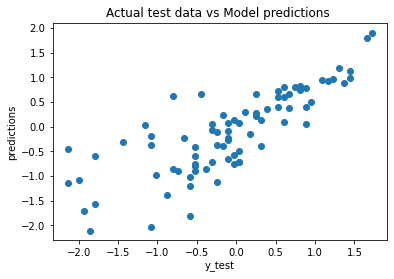

In [ ]:
# Plot showacasing the how well model fitted on testing data
plt.scatter(x=y_test, y=pred);
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.title('Actual test data vs Model predictions ')
plt.show()